# The Forest-fire model
adapted from https://scipython.com/blog/the-forest-fire-model/


A simple model of a forest fire is defined as a two-dimensional cellular automaton on a grid of cells which take one of three states: empty, occupied by a tree, or burning. The automaton evolves according to the following rules which are executed simultaneously for every cell at a given generation.

- A burning cell turns into an empty cell
- A cell occupied by a tree becomes a burning cell if any of its eight neighbouring cells are burning
- A cell occupied by a tree becomes burning with a probabilty f (even if none of its neighbouring cells are burning), as though struck by lightning
- An empty cell becomes occupied by a tree with probability p.

The model is interesting as a simple dynamical system displaying self-organized criticality. 

## Implementation
The following Python code simulates multiple forest fires and forest regrowth.
You can modify the behaviour of the model by adapting the `ffm_step` function.

### imports

Some useful module are imported a the beginning of the execution. 
An couple of utility functions are located in the package `utils.ffm_utils` and are used to visualize the simulation as a movie after running it.
The command `%matplotlib inline` (which is called a notebook [**magic**](https://ipython.readthedocs.io/en/stable/interactive/magics.html)) is used to plot the graphs inline in the notebook interface. 

We also define some useful constants.

In [1]:
import numpy as np
from numpy.random import random
from utils.ffm_utils import run_simulation
%matplotlib inline

# simulation constants
NEIGHBOROOD = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2

## Setting the parameters

You can modify the content of the next cell to modify the parameters of the simulation

In [2]:
# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.01
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# number of frames of simulation
n_frames = 100

## Model implementation

In this cell we define the function `ffm_step` that will be called repeatetly by the the `run_simulation`.
You can modify the model by changing this function. The working matrix `X` will be updated and returned to the the caller function.

In [3]:
# list on which the dimension of every fire will be saved
tot_fires = []

def ffm_step(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    WX = X[1:ny-1, 1:nx-1] 
    
    # fire from the previous iteration becomes empty
    empty_mask = (WX == FIRE)
    WX[empty_mask] = EMPTY

    # create new trees
    tree_mask = ((WX == EMPTY) & (random((ny-2, nx-2)) < p))
    WX[tree_mask] = TREE

    # create new ignitions
    fire_mask = ((WX == TREE) & (random((ny-2, nx-2)) < f))
    WX[fire_mask] = FIRE

    
    step_fires = []
    fires = list(zip(*np.where(X==FIRE)))
    for r, c in (fires):
        pixel_burnt = 0
        burning_cells = [(r, c)]
        
        while len(burning_cells)>0:
            r, c = burning_cells.pop(0)
            for dr,dc in NEIGHBOROOD:
                nr, nc = r+dr, c+dc
                if X[nr, nc] == TREE:
                    X[nr, nc] = FIRE
                    burning_cells.append((nr, nc))
                    pixel_burnt += 1
        
        step_fires.append(pixel_burnt)
    
    tot_fires.append(step_fires)

    return X

## Model run

 99% (99 of 100) |###################### | Elapsed Time: 0:00:24 ETA:   0:00:00

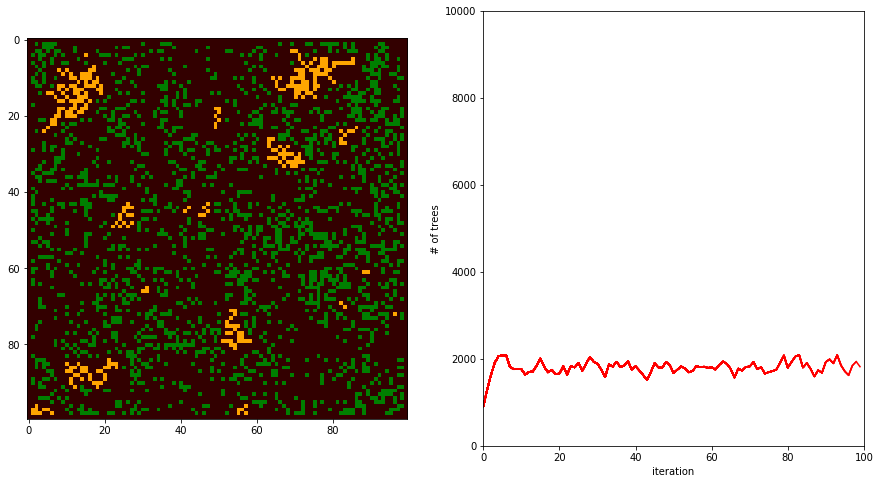

In [4]:
# Initialize the forest grid.
X  = np.zeros((ny, nx))

run_simulation(X, 100, ffm_step)